In [1]:
"""Domanda 8 (Calcolo zero funzione). Discutere i risultati ottenuti per calcolare lo zero 
della funzione f (x) = e^x − x^2 nell’intervallo [−1, 1] utilizzando:
    • metodo di Newton
    • il metodo delle approssimazioni successive con g(x) = x − f (x)e^(x/2)
    • il metodo delle approssimazioni successive con g(x) = x − f (x)e^(−x/2)
mostrando la distanza tra due iterate consecutive e l’ errore commesso al variare delle 
iterazioni (x∗ ≈ −0.703467)."""
import numpy as np
import matplotlib.pyplot as plt

fTrue =  8.035078391532835e-07 

Metodo approssimazioni successive g1 
 x = -0.7034674225096886 
 iter_new= 23 

Metodo approssimazioni successive g2 
 x = -0.48775858993453886 
 iter_new= 100 

Metodo Newton 
 x = -0.7034674224983917 
 iter_new= 6 

Grafo confronto precisione metodi:



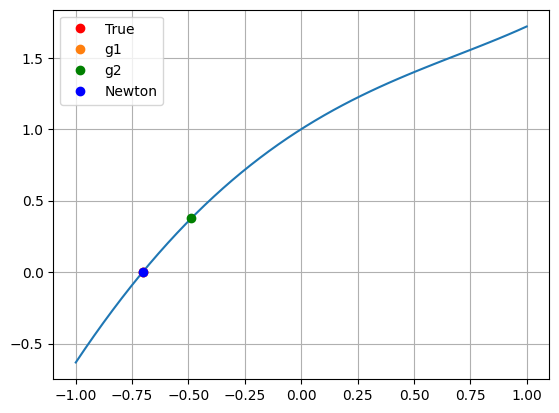

Grafo errore in relazione al numero di iterazioni:



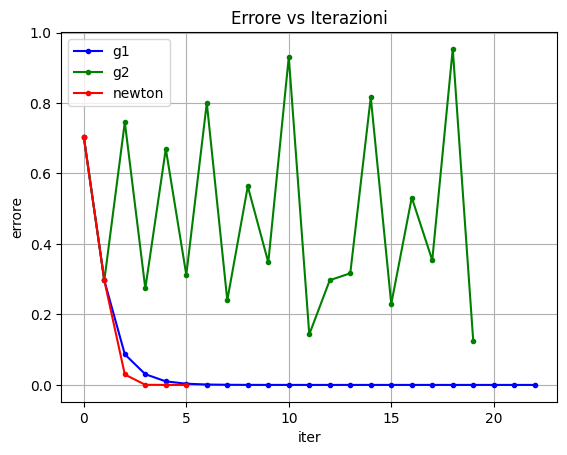

In [6]:
def newton(f, df, tolf, tolx, maxit, xTrue, x0=0): 
    g = lambda x: x -f(x)/df(x) 
    (x, i, err, vecErrore) = succ_app(f, g, tolf, tolx, maxit, xTrue, x0)
    return (x, i, err, vecErrore)
    
def succ_app(f, g, tolf, tolx, maxit, xTrue, x0=0):
  i=0
  err=np.zeros(maxit+1, dtype=np.float64)
  err[0]=tolx+1
  vecErrore=np.zeros(maxit+1, dtype=np.float64)
  vecErrore[0] = np.abs(xTrue - x0)
  x=x0

  while (i < maxit and (np.abs(f(x)) > tolf or np.abs(err[i]) > tolx)): 
    x_new= g(x)
    err[i+1]= np.abs(x_new - x)
    vecErrore[i+1]= np.abs(xTrue - x_new)
    i=i+1
    x=x_new
  err=err[0:i]      
  vecErrore = vecErrore[0:i]
  return (x, i, err, vecErrore) 

f = lambda x: np.exp(x)-x**2
df = lambda x: np.exp(x)-2*x
g1 = lambda x: x-f(x)*np.exp(x/2)
g2 = lambda x: x-f(x)*np.exp(-x/2)

xTrue = -0.703467
fTrue = f(xTrue)
print('fTrue = ', fTrue,'\n')

xplot = np.linspace(-1, 1)
fplot = f(xplot)

plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, 'or', label='True')

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 0

[sol_g1, iter_g1, err_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1,'\n')
plt.plot(sol_g1,f(sol_g1), 'o', label='g1')

[sol_g2, iter_g2, err_g2, vecErrore_g2]=succ_app(f, g2, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g2 \n x =',sol_g2,'\n iter_new=', iter_g2,'\n')
plt.plot(sol_g2,f(sol_g2), 'og', label='g2')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton,'\n')
plt.plot(sol_newton,f(sol_newton), 'ob', label='Newton')

print('Grafo confronto precisione metodi:\n')
plt.legend()
plt.grid()
plt.show()

print('Grafo errore in relazione al numero di iterazioni:\n')
plt.plot(vecErrore_g1, '.-', color='blue')
plt.plot(vecErrore_g2[:20], '.-', color='green')
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend( ("g1", "g2", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()